In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc


In [3]:
df = pd.read_csv("dataset_1672182_resit.csv")
df.head()

,survey_id,gender,study_domain,study_year,avg_grade,housing,budget,relationship,social_events,drinks
0,acd7283f-8d05-4d1b-a1e7-4d09327e04b0,female,social sciences,fourth,7.45,other,average,no,average,6
1,91e1cf0e-fd57-4cfe-b485-c34ae4130816,female,law,fourth,6.85,parents,high,yes,average,9
2,fcd6549e-ca3f-44cd-9f10-589f904bea47,female,business,fourth,7.53,student housing,average,no,average,4
3,1947f389-988a-4085-9156-7eb3768a3c75,female,computer sciences,third,7.16,student housing,average,yes,low,2
4,296ec3d0-c708-4f87-8d1b-2e9fa2331efd,male,health,second,7.84,parents,high,yes,low,2


In [4]:
df.isnull().sum()

survey_id        11
gender            2
study_domain      0
study_year        0
avg_grade         0
housing           0
budget            0
relationship      0
social_events     0
drinks            0
dtype: int64

In [5]:
df = df.dropna()

Question 1:

In [6]:
students = len(df)
print("The total amount of students that answered the survey:", students)

total_drinks = sum(df["drinks"])
print("Total amount of drinks consumed per week:", total_drinks)

print("Average drinks per student per week:", total_drinks/students)

The total amount of students that answered the survey: 337
Total amount of drinks consumed per week: 2154
Average drinks per student per week: 6.3916913946587535


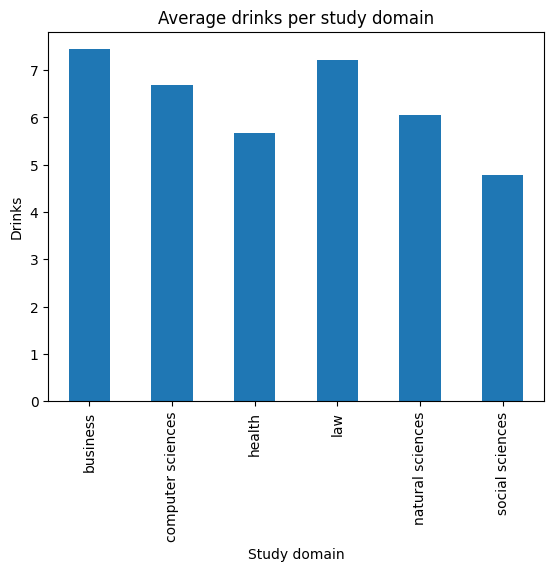

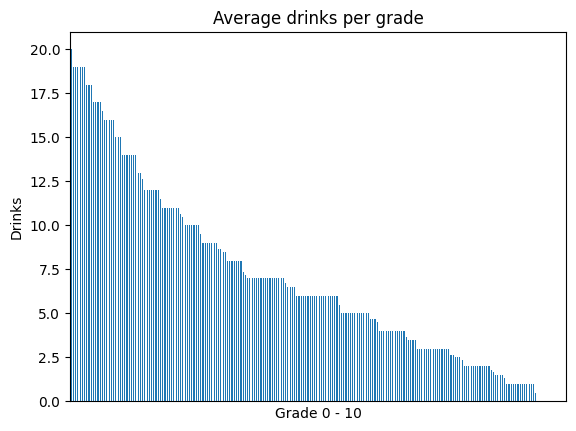

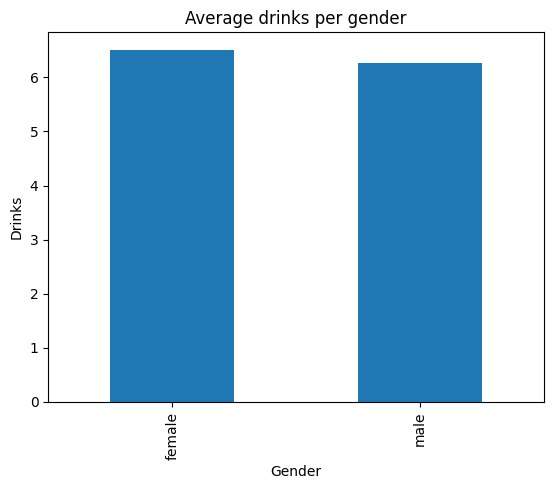

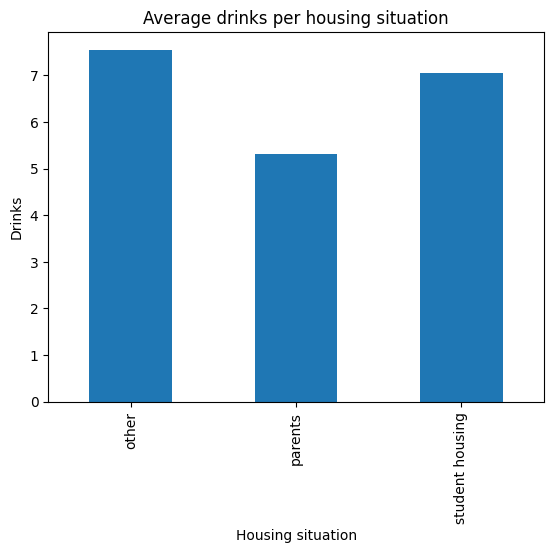

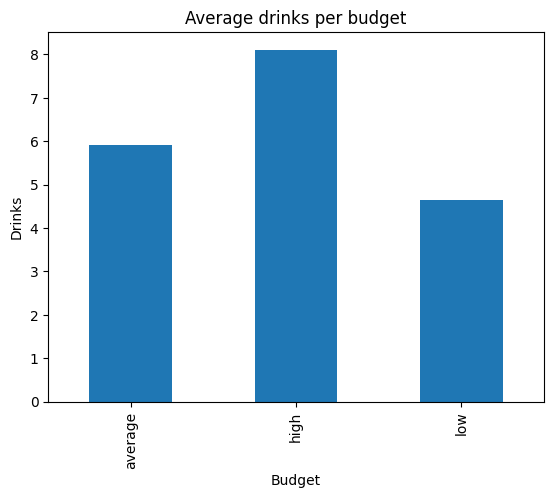

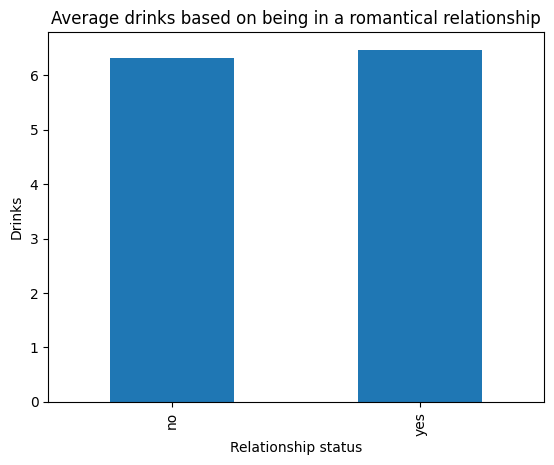

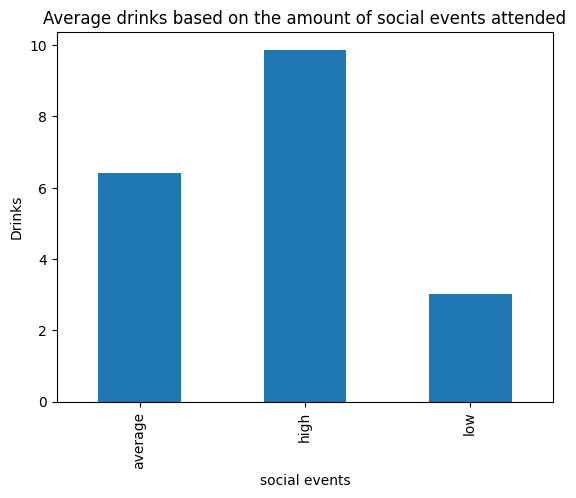

In [31]:
average_drinks_per_domain = df.groupby('study_domain')['drinks'].mean()
#drinks_domain_sorted = average_drinks_per_domain.sort_values(ascending=True)
average_drinks_per_domain.plot(kind='bar', title='Average drinks per study domain', xlabel='Study domain', ylabel='Drinks')
plt.show()
 #drinks per domain

average_drinks_per_grade = df.groupby('avg_grade')['drinks'].mean()
drinks_grade_sorted = average_drinks_per_grade.sort_values(ascending=False)
drinks_grade_sorted.plot(kind='bar', title='Average drinks per grade', xlabel='Grade 0 - 10', ylabel='Drinks')
plt.xticks([]) #removes all the individual markers
plt.show()
 #drinks per domain

average_drinks_per_gender = df.groupby('gender')['drinks'].mean()
average_drinks_per_gender.plot(kind='bar', title='Average drinks per gender', xlabel='Gender', ylabel='Drinks')
plt.show()
#drinks per gender

average_drinks_per_housing = df.groupby('housing')['drinks'].mean()
average_drinks_per_housing.plot(kind='bar', title='Average drinks per housing situation', xlabel='Housing situation', ylabel='Drinks')
plt.show()
#Average drinks per housing situation

average_drinks_per_budget = df.groupby('budget')['drinks'].mean()
average_drinks_per_budget.plot(kind='bar', title='Average drinks per budget', xlabel='Budget', ylabel='Drinks')
plt.show()
#Average drinks based on budget

average_drinks_per_relationship = df.groupby('relationship')['drinks'].mean()
average_drinks_per_relationship.plot(kind='bar', title='Average drinks based on being in a romantical relationship', xlabel='Relationship status', ylabel='Drinks')
plt.show()

average_drinks_per_social_events = df.groupby('social_events')['drinks'].mean()
average_drinks_per_social_events.plot(kind='bar', title='Average drinks based on the amount of social events attended', xlabel='social events', ylabel='Drinks')
plt.show()




#i used .mean() because the for example studies do not have the same amount of students

I have chosen to zoom this experiment in on avg_grade as it is the only variable you can objectively divide into lower being bad and higher being good.
The graph that compares the amount of drinks students had to their average grade is very Right-Skewed, meaning that most of the students that drink alot every week do not have a high average grade. 

Besides the avg_grade there are some other central tendencies such as: that on average business students have the most drinks per week and social sciences students the least, students with a higher budget tend to have more drinks, the amount of social events a student goes to increases their amount of drinks per week, students living in student housing drink more, students in a relationship drink slightly more than students who arent in a relationship and female students on average drink more than male students.

Question 2:

In [8]:
amt_males = (df['gender'] == 'male').sum()
amt_females = (df['gender'] == 'female').sum()
print('Amount of male students:', amt_males)
print('Amount of female students:', amt_females)

male_4drinks = ((df['gender'] == 'male') & (df['drinks'] > 4)).sum()
print("Number of male students consuming more than 4 drinks per week:", male_4drinks)

female_4drinks = ((df['gender'] == 'female') & (df['drinks'] > 4)).sum()
print("Number of female students consuming more than 4 drinks per week:", female_4drinks)

Amount of male students: 171
Amount of female students: 166
Number of male students consuming more than 4 drinks per week: 102
Number of female students consuming more than 4 drinks per week: 89


In [9]:
print('percentage chance that a male student has more than 4 drinks per week:',male_4drinks/amt_males*100)
print('percentage chance that a female student has more than 4 drinks per week:',female_4drinks/amt_females*100)

percentage chance that a male student has more than 4 drinks per week: 59.64912280701754
percentage chance that a female student has more than 4 drinks per week: 53.6144578313253


The conclusion is that the probability of consuming on average more than 4 alcoholic drinks per week is higher for male students than female students.

Question 3:

In [10]:
mean_grade = np.mean(df['avg_grade']) 
print('The average mean grade for the course is:', mean_grade)

The average mean grade for the course is: 7.027952522255193


Question 4A:

Descriptive analysis:

In [11]:
#0 is none, 1-2 is little, 3-4 tolerable, >4 is a lot
def c_drinks(drinks):           #create categories based on the amount of drinks
    if drinks == 0:
        return "None"
    elif 1 <= drinks <= 2:
        return "Little"
    elif 3 <= drinks <= 4:
        return "Tolerable"
    else:
        return "A_lot"

df["drinks_cat"] = df["drinks"].apply(c_drinks) #adding the variables to the dataset under the column drinks_cat

df.head()

,survey_id,gender,study_domain,study_year,avg_grade,housing,budget,relationship,social_events,drinks,drinks_cat
0,acd7283f-8d05-4d1b-a1e7-4d09327e04b0,female,social sciences,fourth,7.45,other,average,no,average,6,A_lot
1,91e1cf0e-fd57-4cfe-b485-c34ae4130816,female,law,fourth,6.85,parents,high,yes,average,9,A_lot
2,fcd6549e-ca3f-44cd-9f10-589f904bea47,female,business,fourth,7.53,student housing,average,no,average,4,Tolerable
3,1947f389-988a-4085-9156-7eb3768a3c75,female,computer sciences,third,7.16,student housing,average,yes,low,2,Little
4,296ec3d0-c708-4f87-8d1b-2e9fa2331efd,male,health,second,7.84,parents,high,yes,low,2,Little


In [12]:
none_students = df[df['drinks_cat'] == 'None']
little_students = df[df['drinks_cat'] == 'Little']
Tolerable_students = df[df['drinks_cat'] == 'Tolerable']
A_lot_students = df[df['drinks_cat'] == 'A_lot']

print("Mean grade none students:", none_students['avg_grade'].mean())
print("Mean grade little students:", little_students['avg_grade'].mean())
print("Mean grade Tolerable students:", Tolerable_students['avg_grade'].mean())
print("Mean grade A_lot students:", A_lot_students['avg_grade'].mean())

Mean grade none students: 7.904814814814815
Mean grade little students: 7.884489795918367
Mean grade Tolerable students: 7.529571428571428
Mean grade A_lot students: 6.500418848167539


In [13]:
print("Standard deviation None students:", (np.std(none_students['avg_grade'], ddof=0)))
print("Standard deviation Little students:", (np.std(little_students['avg_grade'], ddof=0)))
print("Standard deviation Tolerable students:", (np.std(Tolerable_students['avg_grade'], ddof=0)))
print("Standard deviation A_lot students:", (np.std(A_lot_students['avg_grade'], ddof=0)))

Standard deviation None students: 0.5857592121301517
Standard deviation Little students: 0.5679503471560274
Standard deviation Tolerable students: 0.5453843617494145
Standard deviation A_lot students: 0.8517464856840403


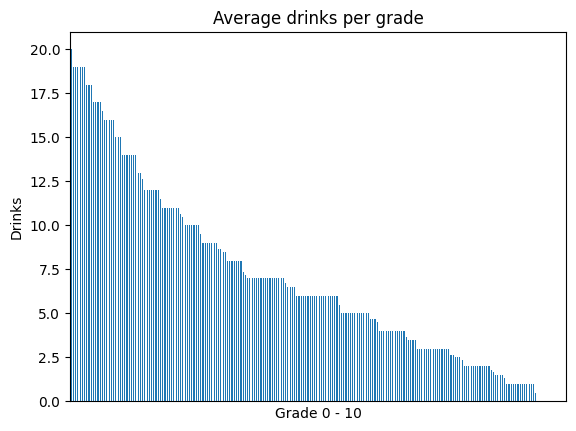

In [14]:
average_drinks_per_grade = df.groupby('avg_grade')['drinks'].mean()
drinks_grade_sorted = average_drinks_per_grade.sort_values(ascending=False)
drinks_grade_sorted.plot(kind='bar', title='Average drinks per grade', xlabel='Grade 0 - 10', ylabel='Drinks')
plt.xticks([]) #used xticks to hide unnecessary markers
plt.show()

Inferential analysis:

Based on the descriptive analysis I ask the question:
Do students that get high grades actually drink less than other students?

Hypothesis: There is significant difference in the grades scored by students who fall in the the drinks_cat 'A_lot' and students who fall in the drinks_cat categories 'None' and 'Little'

Null hypothesis: There is no significant difference in the grades scored by students who fall in the drinks_cat 'A_lot' and students who fall in the drinks_cat 'None' and 'Little' or the students who drink more get higher grades.

In [15]:
def A4_drinks(drinks):           #non_little is categories none and little combined

    if 0 <= drinks <= 2:
        return "non_little"
    else:
        return "not relevant"

df["A4_nonlittle"] = df["drinks"].apply(A4_drinks) #adding the variables to the dataset under the column drinks_cat

nonelittle_students = df[df['A4_nonlittle'] == 'non_little']
df.head()

# i created a new category because i didnt want to mess with the values in drinks_cat

,survey_id,gender,study_domain,study_year,avg_grade,housing,budget,relationship,social_events,drinks,drinks_cat,A4_nonlittle
0,acd7283f-8d05-4d1b-a1e7-4d09327e04b0,female,social sciences,fourth,7.45,other,average,no,average,6,A_lot,not relevant
1,91e1cf0e-fd57-4cfe-b485-c34ae4130816,female,law,fourth,6.85,parents,high,yes,average,9,A_lot,not relevant
2,fcd6549e-ca3f-44cd-9f10-589f904bea47,female,business,fourth,7.53,student housing,average,no,average,4,Tolerable,not relevant
3,1947f389-988a-4085-9156-7eb3768a3c75,female,computer sciences,third,7.16,student housing,average,yes,low,2,Little,non_little
4,296ec3d0-c708-4f87-8d1b-2e9fa2331efd,male,health,second,7.84,parents,high,yes,low,2,Little,non_little


In [16]:
mean_nonelittle_students = nonelittle_students['avg_grade'].mean()
mean_a_lot_students = A_lot_students['avg_grade'].mean()
print(mean_nonelittle_students)
print(mean_a_lot_students)

7.891710526315788
6.500418848167539


In [17]:
A4_ttest = sc.ttest_ind(nonelittle_students['avg_grade'], A_lot_students['avg_grade'], alternative='greater') 
print(f"Test outcome: {A4_ttest}") #the p-value is smaller than 0.05. Meaning the 0 Hypothesis can be rejected and the hypothesis can be accepted.

#This means that there is a statistically significant difference in the grades of students who drink 'none' to 'little' and students who drink 'a lot'

Test outcome: TtestResult(statistic=13.054530588898606, pvalue=1.034413437172083e-30, df=265.0)


Question 4B1

Descriptive analysis:

In [18]:
average_drinks_per_domain = df.groupby('study_domain')['drinks'].mean()
print('Average drinks per study domain:')
print(average_drinks_per_domain)

Average drinks per study domain:
study_domain
business             7.439394
computer sciences    6.673913
health               5.675000
law                  7.220779
natural sciences     6.044444
social sciences      4.777778
Name: drinks, dtype: float64


In [19]:
print(df['study_domain'].unique())

['social sciences' 'law' 'business' 'computer sciences' 'health'
 'natural sciences']


In [20]:
social_sciences_students = df[df['study_domain'] == 'social sciences']
law_students = df[df['study_domain'] == 'law']
business_students = df[df['study_domain'] == 'business']
computer_sciences_students = df[df['study_domain'] == 'computer sciences']
health_students = df[df['study_domain'] == 'health']
natural_sciences_students = df[df['study_domain'] == 'natural sciences']

print("Standard deviation Social sciences students:", (np.std(social_sciences_students['drinks'], ddof=0)))
print("Standard deviation Law students:", (np.std(law_students['drinks'], ddof=0)))
print("Standard deviation Business students:", (np.std(business_students['drinks'], ddof=0)))
print("Standard deviation Computer sciences students:", (np.std(computer_sciences_students['drinks'], ddof=0)))
print("Standard deviation Health students:", (np.std(health_students['drinks'], ddof=0)))
print("Standard deviation Natural sciences students:", (np.std(natural_sciences_students['drinks'], ddof=0)))

Standard deviation Social sciences students: 3.9818813629630556
Standard deviation Law students: 4.950727026822796
Standard deviation Business students: 4.609373808384151
Standard deviation Computer sciences students: 5.145932745239245
Standard deviation Health students: 4.844520100071832
Standard deviation Natural sciences students: 5.324808000943657


In [21]:
df['average_drinks_per_domain'] = df.groupby('study_domain')['drinks'].transform('mean')
df.head()

,survey_id,gender,study_domain,study_year,avg_grade,housing,budget,relationship,social_events,drinks,drinks_cat,A4_nonlittle,average_drinks_per_domain
0,acd7283f-8d05-4d1b-a1e7-4d09327e04b0,female,social sciences,fourth,7.45,other,average,no,average,6,A_lot,not relevant,4.777778
1,91e1cf0e-fd57-4cfe-b485-c34ae4130816,female,law,fourth,6.85,parents,high,yes,average,9,A_lot,not relevant,7.220779
2,fcd6549e-ca3f-44cd-9f10-589f904bea47,female,business,fourth,7.53,student housing,average,no,average,4,Tolerable,not relevant,7.439394
3,1947f389-988a-4085-9156-7eb3768a3c75,female,computer sciences,third,7.16,student housing,average,yes,low,2,Little,non_little,6.673913
4,296ec3d0-c708-4f87-8d1b-2e9fa2331efd,male,health,second,7.84,parents,high,yes,low,2,Little,non_little,5.675000


<Axes: title={'center': 'Average drinks per study domain'}, xlabel='Study domain', ylabel='Drinks'>

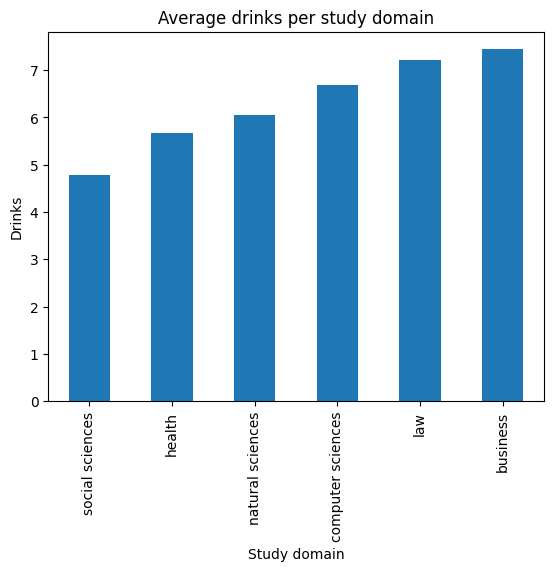

In [22]:
drinks_domain_sorted = average_drinks_per_domain.sort_values(ascending=True)

drinks_domain_sorted.plot(kind='bar', title='Average drinks per study domain', xlabel='Study domain', ylabel='Drinks')

Inferential analysis:

Hypothesis: There is significant difference in the average amount of drinks consumed by business students and social sciences students.

Null hypothesis: There is no significant difference in the average amount of drinks consumed by business students and social sciences students or the social sciences students drink more.

In [23]:
mean_social_sciences_students = social_sciences_students['drinks'].mean()
mean_business_students = business_students['drinks'].mean()
print("Mean average drinks social sciences students:", mean_social_sciences_students)
print("Mean average drinks business students:", mean_business_students)

Mean average drinks social sciences students: 4.777777777777778
Mean average drinks business students: 7.4393939393939394


In [24]:
B41_ttest = sc.ttest_ind(social_sciences_students['drinks'], business_students['drinks'], alternative='less') 
print(f"Test outcome: {B41_ttest}") #the p-value is smaller than 0.05. Meaning the 0 Hypothesis can be rejected and the hypothesis can be accepted.

#This means that there is a statistically significant difference in the average amount of drinks consumed by students who study business and students who study social sciences

Test outcome: TtestResult(statistic=-3.4752443572045584, pvalue=0.0003494687758993463, df=127.0)


Question 4C2

Descriptive analysis:

In [25]:
average_drinks_per_domain = df.groupby('relationship')['drinks'].mean()
print('Average drinks based on being or not being in a romantic relationship:')
print(average_drinks_per_domain)

Average drinks based on being or not being in a romantic relationship:
relationship
no     6.317647
yes    6.467066
Name: drinks, dtype: float64


In [26]:
rno_students = df[df['relationship'] == 'no']
ryes_students = df[df['relationship'] == 'yes']

print("Standard deviation students in a romantical relationship:", (np.std(rno_students['drinks'], ddof=0)))
print("Standard deviation not in a romantical relationship:", (np.std(ryes_students['drinks'], ddof=0)))

Standard deviation students in a romantical relationship: 4.973368522809045
Standard deviation not in a romantical relationship: 4.791190057732428


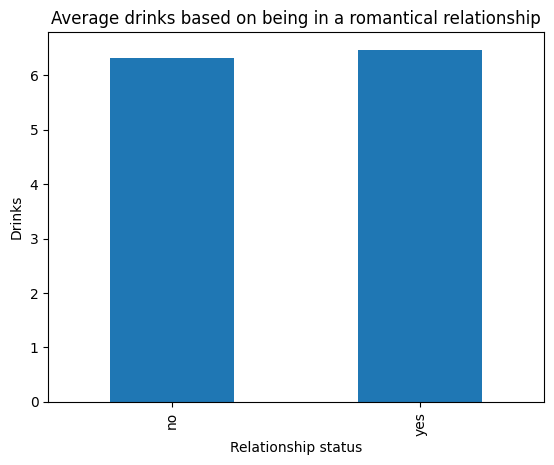

In [27]:
average_drinks_per_relationship = df.groupby('relationship')['drinks'].mean()
average_drinks_per_relationship.plot(kind='bar', title='Average drinks based on being in a romantical relationship', xlabel='Relationship status', ylabel='Drinks')
plt.show()

Inferential analysis:

Based on the descriptive analysis I ask the question: Do students who arent in a romantical relationship drink more than students who are in a romantical relationship

Hypothesis: There is a significant difference in in the average amount of drinks consumed by students who are in a relationship compared to students who arent in a relationship

Null Hypothesis: There isn't a significant difference in in the average amount of drinks consumed by students who are in a relationship compared to students who arent in a relationship or the single students drink more.

In [28]:
mean_rno_students = rno_students['drinks'].mean()
mean_ryes_students = ryes_students['drinks'].mean()
print("Mean average drinks students not in a romantical relationship:", mean_rno_students)
print("Mean average drinks students in a romantical relationship:", mean_ryes_students)

Mean average drinks students not in a romantical relationship: 6.317647058823529
Mean average drinks students in a romantical relationship: 6.467065868263473


In [29]:
C42_ttest = sc.ttest_ind(rno_students['drinks'], ryes_students['drinks'], alternative='greater') 
print(f"Test outcome: {C42_ttest}") #the p-value is bigger than 0.05. Meaning the Hypothesis can be rejected and the 0 Hypothesis can be accepted.

Test outcome: TtestResult(statistic=-0.2799691535194414, pvalue=0.6101630182903895, df=335.0)
